In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,10

tf.random.set_seed(7)

df = pd.read_csv('Diesel.csv', engine='python')
# # df = pd.read_csv('Gasoline.csv')
# dataset = df.values
# dataset = df.astype('float32')
df

# load the dataset
# df = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')

,Tanggal,qty,Jumlah
0,2016-01-01,836,5600932.0
1,2016-01-02,964,6460341.0
2,2016-01-03,1900,12727990.0
3,2016-01-04,1944,13023929.0
4,2016-01-05,7653,43238490.0
...,...,...,...
2083,2021-12-27,3892,20043800.0
2084,2021-12-28,3848,19817200.0
2085,2021-12-29,3915,20162250.0
2086,2021-12-30,2715,13982250.0


Text(0.5, 0, 'Date')

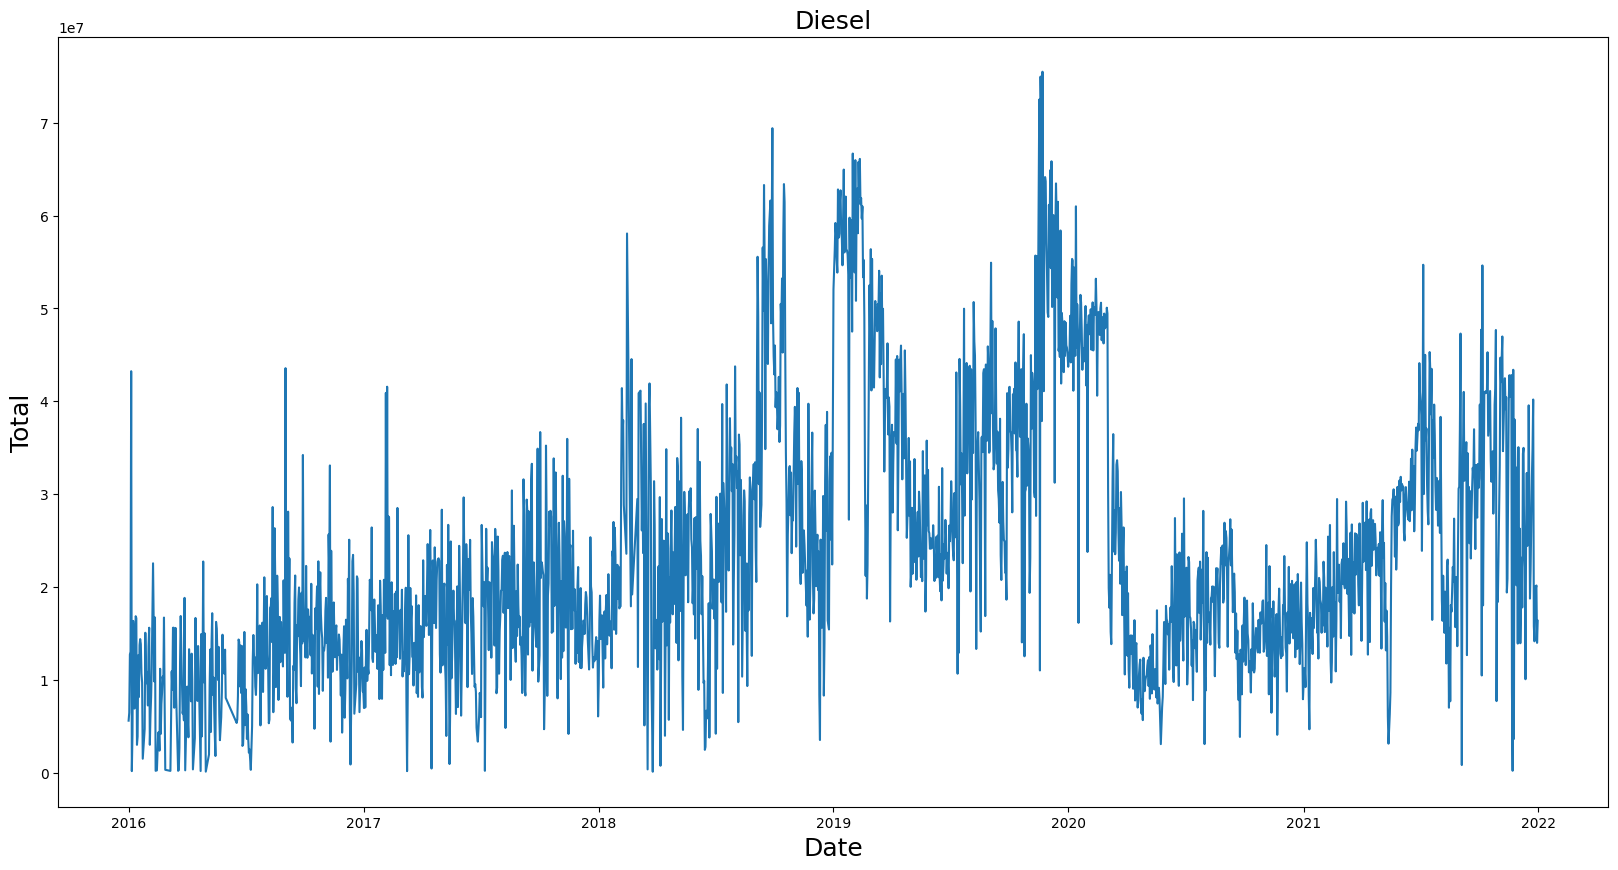

In [35]:
# Mengatur Tanggal dan Data
df['Tanggal'] = pd.to_datetime(df.Tanggal, format='%Y-%m-%d')
df.index = df['Tanggal']

#Plot
plt.figure(figsize=(20,10))
plt.plot(df['Jumlah'],label='History Harga Penutup')
plt.title('Diesel', fontsize=18)
plt.ylabel('Total',fontsize=18)
plt.xlabel('Date',fontsize=18)

In [36]:
#Membuat Matrix 2 Dimensi
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Tanggal','Jumlah'])
for i in range(0,len(df)):
    new_data['Tanggal'][i] = data['Tanggal'][i]
    new_data['Jumlah'][i] = data['Jumlah'][i]
    
#Membuat Tanggal menjadi Index di variable new_data
new_data.index = new_data['Tanggal']
new_data.drop('Tanggal',axis=1,inplace=True)

dataset = new_data.values 
# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

/tmp/ipykernel_31986/4227888415.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Tanggal'][i] = data['Tanggal'][i]
/tmp/ipykernel_31986/4227888415.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Jumlah'][i] = data['Jumlah'][i]


1670 418


In [37]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [38]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [39]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(60, input_shape=(1, look_back)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1, batch_size=1, verbose=1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.float64).